# Analysis of selected funds

Main insights:
    - ~3700 unique funds iver the complete timeframe
    - Strong break in 2010 (few observations before)
    - ~2500 unique funds per year
    - ~6% of funds change their lipper class over the complete timeframe
    

In [58]:
import feather

import pandas as pd
import matplotlib.pyplot as plt

In [59]:
# Convert to date format
begin_date = '2003-01-01' 
end_date   = '2019-12-31'

In [60]:
path = '../data/processed/row_info.feather'
info_df = feather.read_dataframe(path)

In [61]:
info_df = info_df.query('report_dt >= @begin_date and report_dt <= @end_date')

In [62]:
info_df.sample()

,crsp_fundno,crsp_portno,fund_name,report_dt,lipper_class,cap_class,style_class,row
11203,22178,1022676,"Nicholas Equity Income Fund, Inc",2010-06-30,EIEI,E,E,11203


## Number of unique port_nos and fund_nos

In [63]:
info_df['report_dt'].describe()

count                   50617
unique                     45
top       2010-09-30 00:00:00
freq                     2466
first     2003-03-31 00:00:00
last      2017-06-30 00:00:00
Name: report_dt, dtype: object

In [64]:
print(info_df['crsp_portno'].nunique())
print(info_df['crsp_fundno'].nunique())

3705
3705


## Number of unique funds per year

#### Something seems odd
Break in 2009 not clear

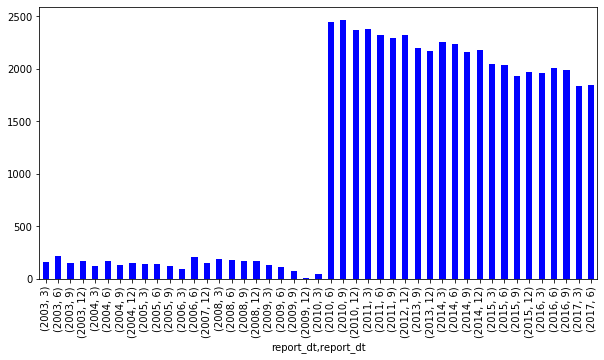

In [65]:
# Analysis of selected funds

## Distribution by date(info_df["report_dt"]
(info_df["crsp_portno"]
    .groupby([
         info_df["report_dt"].dt.year,
         info_df["report_dt"].dt.month
     ])
     .nunique()
     .plot(kind="bar",
           color = 'b',
           figsize=(10,5)))

## Distribution by number of observations per fund 

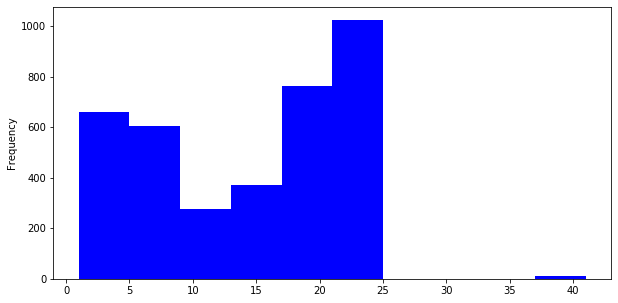

In [66]:
(info_df["crsp_portno"]
     .groupby([
         info_df["crsp_portno"],
     ])
     .count()
     .plot(kind="hist",
#           bins = 84,
           color = 'b',
           figsize=(10,5)))

## Take only the end of the year observation per fund

In [67]:
index = (info_df
     .assign(year = info_df["report_dt"].dt.year)
     .groupby(['crsp_portno','year'])
     [['crsp_portno','report_dt']]
     .tail(1)
     .index)

In [68]:
info_df = info_df.loc[index]

## Distribution by lipper_class

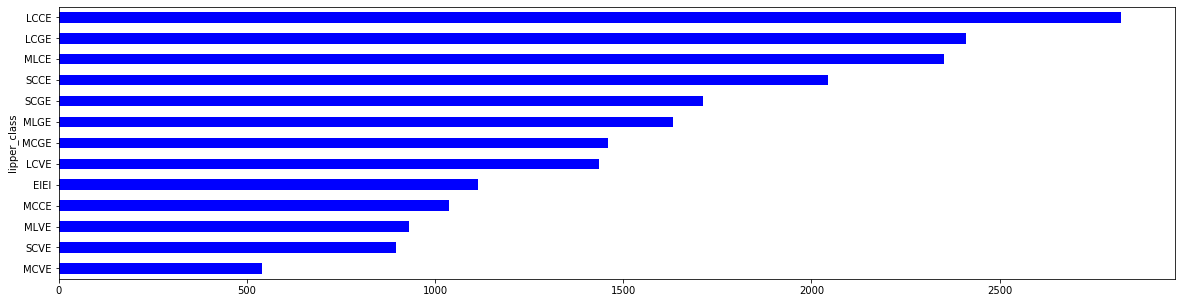

In [69]:
(info_df['crsp_portno']
     .groupby([
         info_df["lipper_class"],
     ])
     .count()
     .sort_values()
     .plot(kind="barh",
           color = 'b',
           figsize=(20,5)))

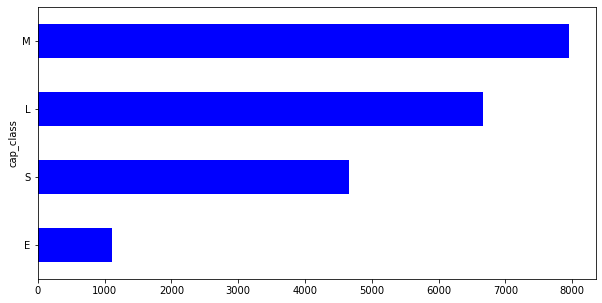

In [70]:
(info_df['crsp_portno']
     .groupby([
         info_df['cap_class'],
     ])
     .count()
     .sort_values()
     .plot(kind='barh',
           color = 'b',
           figsize=(10,5)))

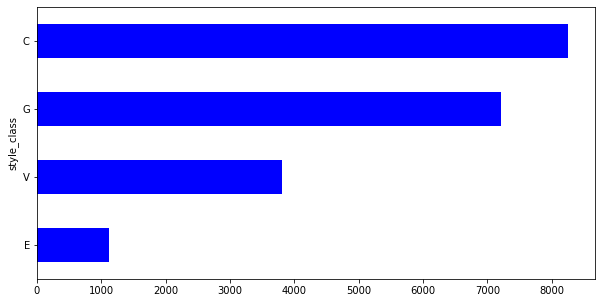

In [71]:
(info_df['crsp_portno']
     .groupby([
         info_df['style_class'],
     ])
     .count()
     .sort_values()
     .plot(kind='barh',
           color = 'b',
           figsize=(10,5)))

## How often do lipper_classes change?


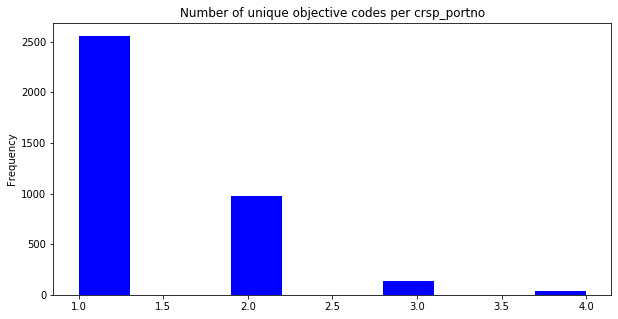

In [72]:
obj_per_portno = info_df[['crsp_portno','lipper_class']]
ax = (obj_per_portno['lipper_class']
    .groupby([
        obj_per_portno["crsp_portno"]
    ])
    .nunique()
    .sort_values()
    .plot(kind='hist',
          color = 'b',
          bins = 10,
          figsize=(10,5),
          title='Number of unique objective codes per crsp_portno')
)

In [73]:
lagged_class = info_df[['crsp_portno','report_dt','lipper_class']]

lagged_class = lagged_class.assign(lag_lipper_class = lagged_class.lipper_class.shift())
lagged_class = lagged_class.dropna()

mask = lagged_class.groupby(by = 'crsp_portno').head(1).index
lagged_class = lagged_class[~lagged_class.index.isin(mask)]

round(pd.crosstab(lagged_class.lipper_class, lagged_class.lag_lipper_class, normalize = 'all') * 100,2)

lag_lipper_class,EIEI,LCCE,LCGE,LCVE,MCCE,MCGE,MCVE,MLCE,MLGE,MLVE,SCCE,SCGE,SCVE
lipper_class,,,,,,,,,,,,,
EIEI,5.42,0.02,0.01,0.02,0.00,0.01,0.00,0.00,0.01,0.05,0.00,0.00,0.01
LCCE,0.02,12.57,0.25,0.32,0.00,0.00,0.00,0.44,0.08,0.06,0.00,0.00,0.00
LCGE,0.00,0.23,11.04,0.00,0.01,0.00,0.00,0.05,0.35,0.00,0.00,0.00,0.00
LCVE,0.05,0.46,0.01,6.33,0.00,0.00,0.00,0.08,0.01,0.22,0.00,0.00,0.00
MCCE,0.00,0.00,0.00,0.00,4.18,0.16,0.35,0.23,0.04,0.05,0.08,0.00,0.01
MCGE,0.00,0.00,0.00,0.00,0.22,6.56,0.00,0.01,0.26,0.00,0.01,0.10,0.00
MCVE,0.01,0.01,0.00,0.00,0.25,0.01,2.18,0.04,0.00,0.10,0.02,0.00,0.05
MLCE,0.01,0.47,0.09,0.07,0.21,0.04,0.05,9.77,0.32,0.29,0.00,0.00,0.00
MLGE,0.00,0.02,0.52,0.00,0.02,0.34,0.00,0.35,6.84,0.01,0.00,0.00,0.00


In [74]:
lagged_class = info_df[['crsp_portno','report_dt','style_class']]

lagged_class = lagged_class.assign(lag_style_class = lagged_class.style_class.shift())
lagged_class = lagged_class.dropna()

mask = lagged_class.groupby(by = 'crsp_portno').head(1).index
lagged_class = lagged_class[~lagged_class.index.isin(mask)]

pd.crosstab(lagged_class.style_class, lagged_class.lag_style_class)

lag_style_class,C,E,G,V
style_class,,,,
C,6224,4,208,301
E,4,904,4,12
G,200,0,5707,2
V,278,11,6,2823


In [75]:
lagged_class = info_df[['crsp_portno','report_dt','cap_class']]

lagged_class = lagged_class.assign(lag_cap_class = lagged_class.cap_class.shift())
lagged_class = lagged_class.dropna()

mask = lagged_class.groupby(by = 'crsp_portno').head(1).index
lagged_class = lagged_class[~lagged_class.index.isin(mask)]

round(pd.crosstab(lagged_class.cap_class, lagged_class.lag_cap_class, margins = True, normalize= 'all') *100,2)

lag_cap_class,E,L,M,S,All
cap_class,,,,,
E,5.42,0.05,0.06,0.01,5.54
L,0.07,31.21,1.30,0.00,32.58
M,0.01,1.53,36.96,0.26,38.76
S,0.01,0.00,0.43,22.68,23.12
All,5.51,32.80,38.75,22.94,100.00


In [76]:
pd.crosstab(lagged_class.cap_class, lagged_class.lag_cap_class, margins = True)

lag_cap_class,E,L,M,S,All
cap_class,,,,,
E,904,9,10,1,924
L,12,5208,217,0,5437
M,2,256,6168,43,6469
S,1,0,72,3785,3858
All,919,5473,6467,3829,16688


### Fund names

In [77]:
info_df['fund_name'].unique()

array(['AIM Counselor Series Trust (Invesco Counselor Series Trust): Invesco Equity & Income Fund; Class A Shares',
       'JPMorgan Trust II: JPMorgan Diversified Mid Cap Value Fund; Class A Shares',
       'JPMorgan Trust II: JPMorgan Diversified Mid Cap Growth Fund; Ultra Shares',
       ...,
       'Forum Funds II: Acuitas US Microcap Fund; Institutional Class Shares',
       'Dreyfus Opportunity Funds: Dreyfus Strategic Beta US Equity Fund; Class A Shares',
       'Northern Lights Fund Trust III: HCM Tactical Growth Fund; Class A Shares'],
      dtype=object)

In [78]:
info_df.loc[info_df['fund_name'].astype(str).str.contains('T Rowe Price Institutional Large-Cap Core Growth Fund'),'fund_name'].values

array(['T Rowe Price Institutional Equity Funds, Inc: T Rowe Price Institutional Large-Cap Core Growth Fund',
       'T Rowe Price Institutional Equity Funds, Inc: T Rowe Price Institutional Large-Cap Core Growth Fund',
       'T Rowe Price Institutional Equity Funds, Inc: T Rowe Price Institutional Large-Cap Core Growth Fund',
       'T Rowe Price Institutional Equity Funds, Inc: T Rowe Price Institutional Large-Cap Core Growth Fund',
       'T Rowe Price Institutional Equity Funds, Inc: T Rowe Price Institutional Large-Cap Core Growth Fund',
       'T Rowe Price Institutional Equity Funds, Inc: T Rowe Price Institutional Large-Cap Core Growth Fund',
       'T Rowe Price Institutional Equity Funds, Inc: T Rowe Price Institutional Large-Cap Core Growth Fund',
       'T Rowe Price Institutional Equity Funds, Inc: T Rowe Price Institutional Large-Cap Core Growth Fund'],
      dtype=object)